## <center>__Credit Card Fraud Detection__

### <center>_Author: Muhammad Taimoor Khan_

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# reading the data into the dataframe
credit_card_data = pd.read_csv("creditcard.csv")
print("Dataset read successfully!")

Dataset read successfully!


In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# checking for missing values in the Credit Card Data
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<code> This dataset is highly unbalanced as 99% of the data is for label 0 while only less than 1% is for label 1, where
<p>0 --> Normal Transaction
<p>1 --> Fraudulent Transaction 

In [11]:
# seperating the legit and fraudulent transationcs
legit = credit_card_data[credit_card_data.Class == 0]
fraudulent = credit_card_data[credit_card_data.Class == 1]

In [12]:
print("The size of legit data is {0} and the size of fraudulent data is {1}".format(legit.shape,fraudulent.shape))

The size of legit data is (284315, 31) and the size of fraudulent data is (492, 31)


In [17]:
# statistical measures of the Legit data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
# statistical measures of the Fraudulent data
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
# compare the values for both type of transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<hr>
<h2> Under-Sampling </h2>

Build a sample dataset containing similar distribution of Legit transactions and Fraudulent Transactions
<p><code> Number of Legit Transactions --> 284315
<p> Number of Fraudulent Transcations --> 492</code>
<br>
<p> So we will take random 492 values from Legit Transactions to avoid any further anomaly.

In [21]:
legit_sample = legit.sample(n=492)

Contatenating the two dataframes

In [25]:
new_df = pd.concat([legit_sample, fraudulent], axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51933,45196.0,1.070225,-0.518133,1.098103,0.217821,-1.233953,-0.416981,-0.537449,-0.020708,0.965511,...,-0.063022,-0.123660,-0.015737,0.499335,0.110429,0.979109,-0.043467,0.031413,84.95,0
19294,30154.0,-1.091419,-0.104713,2.024913,-3.328192,0.189513,-0.380764,0.161084,0.181299,1.077698,...,0.207643,0.624549,-0.488471,-0.419395,0.791801,-0.199338,0.025689,0.047143,20.56,0
229568,145972.0,2.025052,-0.046654,-1.174672,0.187947,0.239758,-0.465624,0.089564,-0.146682,0.126845,...,-0.229586,-0.562408,0.355547,0.788201,-0.283629,0.138852,-0.073737,-0.060473,3.29,0
87868,61884.0,-0.772620,0.695462,1.154006,-1.932183,0.030129,-1.431541,0.948675,-0.327937,0.599804,...,-0.033753,-0.119121,-0.079518,0.378555,-0.017930,-0.913382,-0.135481,0.152285,15.20,0
141131,84138.0,-1.655482,0.912603,0.521204,-1.402714,-0.562558,-0.321791,-0.394560,0.974194,0.407966,...,-0.072691,-0.306439,0.203746,-0.343277,-0.313850,0.727084,-0.365448,-0.279046,0.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [30]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<center> We can see that the values are evenly distributed.

In [31]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93568.922764,0.095229,0.044635,0.081004,-0.078563,-0.006977,-0.043653,0.000999,-0.013215,0.030207,...,0.033451,0.021243,0.011680,0.001939,0.04321,0.004067,0.003896,-0.007174,-0.004314,79.650122
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


<hr>
<h2> Splitting Data into Features and Targets </h2>

In [32]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [35]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
51933    45196.0  1.070225 -0.518133  1.098103  0.217821 -1.233953 -0.416981   
19294    30154.0 -1.091419 -0.104713  2.024913 -3.328192  0.189513 -0.380764   
229568  145972.0  2.025052 -0.046654 -1.174672  0.187947  0.239758 -0.465624   
87868    61884.0 -0.772620  0.695462  1.154006 -1.932183  0.030129 -1.431541   
141131   84138.0 -1.655482  0.912603  0.521204 -1.402714 -0.562558 -0.321791   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [36]:
print(Y)

51933     0
19294     0
229568    0
87868     0
141131    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


<hr>
<h2> Splitting the Data into Training Data & Testing Data </h2>

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=2)

In [46]:
print("The original data set 'X' have the size of {0}, the training dataset 'X_train' have the size of {1}, and the testing dataset 'X_test' have the size of {2}".format(X.shape, X_train.shape, X_test.shape))

The original data set 'X' have the size of (984, 30), the training dataset 'X_train' have the size of (738, 30), and the testing dataset 'X_test' have the size of (246, 30)


In [45]:
print("The original data set 'Y' have the size of {0}, the training dataset 'Y_train' have the size of {1}, and the testing dataset 'Y_test' have the size of {2}".format(Y.shape, Y_train.shape, Y_test.shape))

The original data set 'Y' have the size of (984,), the training dataset 'Y_train' have the size of (738,), and the testing dataset 'Y_test' have the size of (246,)


<hr>
<h2> Model Training </h2>
<h3> Logisitic Regression Model </h3>

In [49]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

<hr>
<h2> Model Evaluation </h2>

<h3> Accuracy Score: </h3>

In [64]:
# accuracy on training data
X_train_predict = model.predict(X_train)
print ("The first five predictions on training data are: {0}".format(X_train_predict[0:5]))
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
print ("The accuracy score on training data is {0}%".format(int(training_data_accuracy*100)))

The first five predictions on training data are: [0 0 0 1 0]
The accuracy score on training data is 92%


In [63]:
# accuracy on testing data
X_test_predict = model.predict(X_test)
print ("The first five predictions on testing data are: {0}".format(X_test_predict[0:5]))
testing_data_accuracy = accuracy_score(X_test_predict, Y_test)
print ("The accuracy score on testing data is {0}%".format(int(testing_data_accuracy*100)))

The first five predictions on testing data are: [1 0 0 0 1]
The accuracy score on testing data is 89%


<h3> F1- Score: </h3>

In [81]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_train, X_train_predict)
print("The F1 Score on training data is {0}".format(f1))


The F1 Score on training data is 0.9260808926080891


In [80]:
f1 = f1_score(Y_test, X_test_predict)
print("The F1 Score on testing data is {0}".format(f1))


The F1 Score on testing data is 0.8917748917748918


<hr>

<h2> Visualizatons </h2>

<h3> Confusion Matrix: </h3>

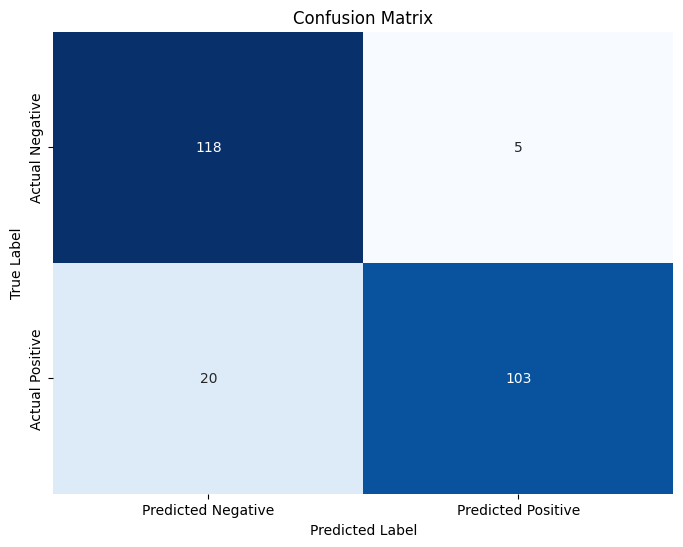

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(Y_test, X_test_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


<h3> ROC Curve: </h3>

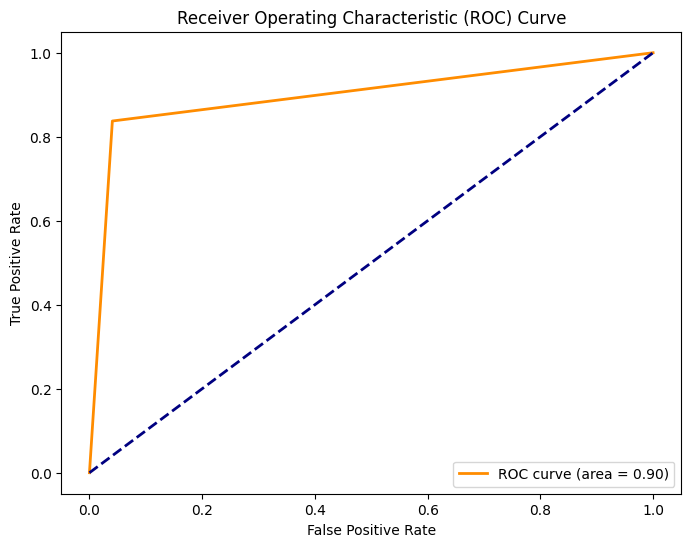

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true and y_prob are your true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test, X_test_predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<h3> Precision-Recall Curve: </h3>

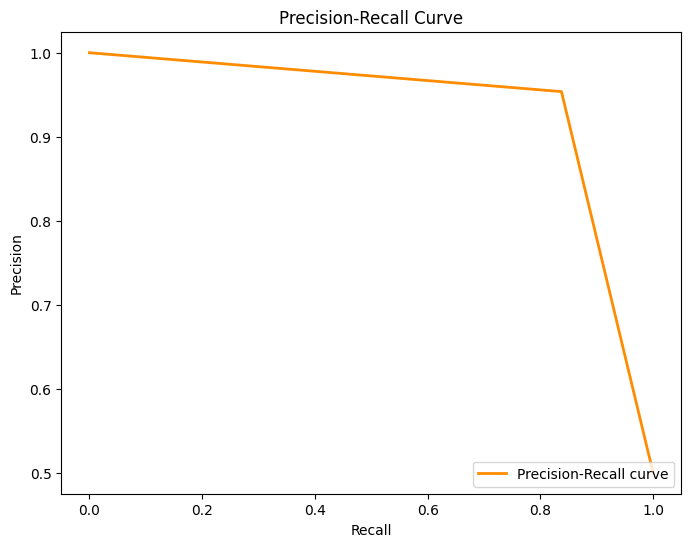

In [72]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true and y_prob are your true labels and predicted probabilities
precision, recall, thresholds = precision_recall_curve(Y_test, X_test_predict)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


<hr>

## Credit Card Fraud Detection System Evaluation

### Logistic Regression Model

#### Model Accuracy

- **Training Data Accuracy: 92%**
- **Testing Data Accuracy: 89%**

### Model Performance

#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It helps visualize the performance of the algorithm.

|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| Actual Negative | True Negative (TN) | False Positive (FP) |
| Actual Positive | False Negative (FN) | True Positive (TP) |

#### Precision, Recall, and F1 Score

- **Precision (Positive Predictive Value):** Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.

- **Recall (Sensitivity or True Positive Rate):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. High recall relates to the low false negative rate.

- **F1 Score:** F1 Score is the weighted average of Precision and Recall. It is a good way to show that a classifer has a good value for both recall and precision.

### Conclusion

The Logistic Regression model achieved promising results with an accuracy of 92% on the training data and 89% on the testing data. The confusion matrix and other metrics provide a detailed understanding of the model's performance. Further fine-tuning and evaluation on real-world data are recommended for robust deployment.
